- 머신러닝 알고리즘은 모델의 구조가 어느 정도 고정되어 있음
    - 좋은 성능을 내기 위해서는 매개변수를 조정하고 훈련하는 과정을 반복
    
- 딥러닝은 구조를 직접 설계해야함
    - 좋은 성능을 내기 위해 다룰 수 있는 다양한 개념과 도구들을 이해할 필요가 있음

# 손실 곡선

- 케라스의 fit() 메서드는 History 클래스 객체를 반환
    - History 객체 : 훈련 과정에서 계산한 지표(손실과 정확도값)가 저장되어 있음
    - 이 값을 사용하여 그래프를 그려서 훈련 성과를 확인

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
scaled_train = x_train / 255
scaled_train, scaled_val, y_train, y_val = train_test_split(scaled_train, y_train,
                                                            test_size = 0.2, random_state = 5)

In [3]:
# 모델 정의 함수
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Dense(100, activation = "relu"))
    
    if a_layer:
        model.add(a_layer)
        
    model.add(keras.layers.Dense(10, activation = "softmax"))
    
    return model

In [5]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")

In [6]:
history = model.fit(scaled_train, y_train, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5297 - accuracy: 0.8134
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3886 - accuracy: 0.8605
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3556 - accuracy: 0.8731
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3331 - accuracy: 0.8817
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3225 - accuracy: 0.8859


In [7]:
# history 객체 확인
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [8]:
history.history["loss"]

[0.5297189354896545,
 0.3885959982872009,
 0.35564616322517395,
 0.33306294679641724,
 0.3224942088127136]

- 기본적으로 손실을 계산하고 compile에서 accuracy를 추가하여서 loss와 accuracy가 포함됨

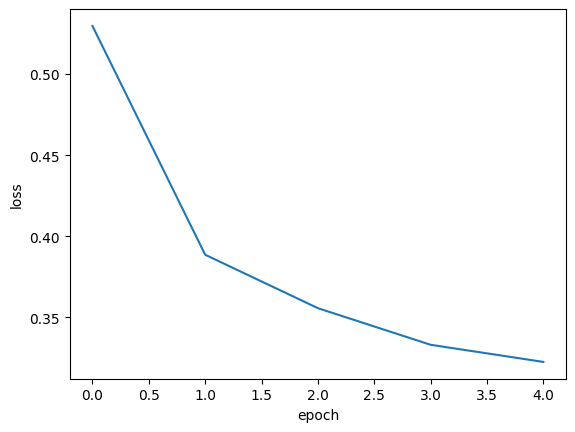

In [9]:
plt.figure()

plt.plot(history.history["loss"])

plt.xlabel("epoch")
plt.ylabel("loss")

plt.show()

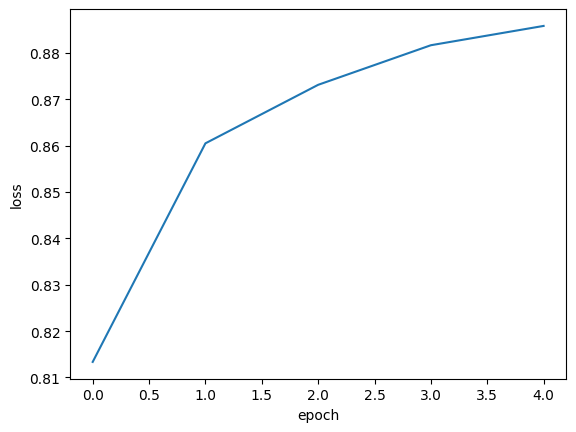

In [10]:
plt.figure()

plt.plot(history.history["accuracy"])

plt.xlabel("epoch")
plt.ylabel("loss")

plt.show()

In [12]:
# epoch 를 20으로 늘려서 그래프 확인
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(scaled_train, y_train, epochs = 20)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5399 - accuracy: 0.8114
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3964 - accuracy: 0.8578
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3594 - accuracy: 0.8714
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3347 - accuracy: 0.8801
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3208 - accuracy: 0.8851
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3063 - accuracy: 0.8896
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2975 - accuracy: 0.8948
Epoch 8/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2906 - accuracy: 0.8972
Epoch 9/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2821 - accuracy: 0.9010
Epoch 10/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.274

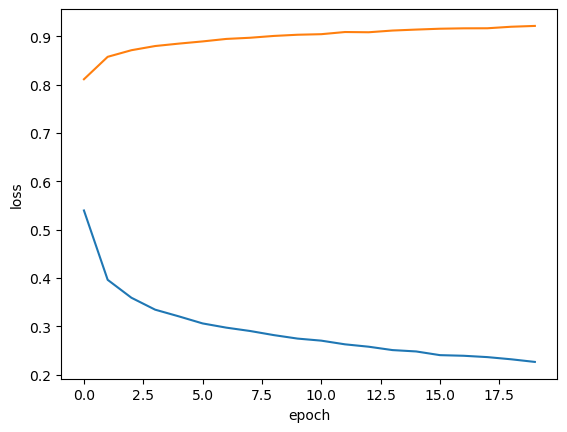

In [13]:
plt.figure()

plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["accuracy"], label = "acc")

plt.xlabel("epoch")
plt.ylabel("loss")

plt.show()

# 검증 손실

- 에포크에 따른 과대적합과 과소적합을 파악하려면 검증 세트에 대한 점수도 파악해야함
- 케라스에서는 fit()메서드에 검증 데이터를 전달할 수 있음

In [14]:
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5348 - accuracy: 0.8112 - val_loss: 0.4198 - val_accuracy: 0.8513
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3901 - accuracy: 0.8612 - val_loss: 0.4119 - val_accuracy: 0.8521
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3558 - accuracy: 0.8726 - val_loss: 0.4055 - val_accuracy: 0.8570
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3348 - accuracy: 0.8807 - val_loss: 0.3471 - val_accuracy: 0.8730
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3196 - accuracy: 0.8861 - val_loss: 0.3842 - val_accuracy: 0.8709
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3088 - accuracy: 0.8907 - val_loss: 0.3535 - val_accuracy: 0.8777
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2988 - accuracy: 0.8937 - val_loss: 0.3405 - val_accuracy:

In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


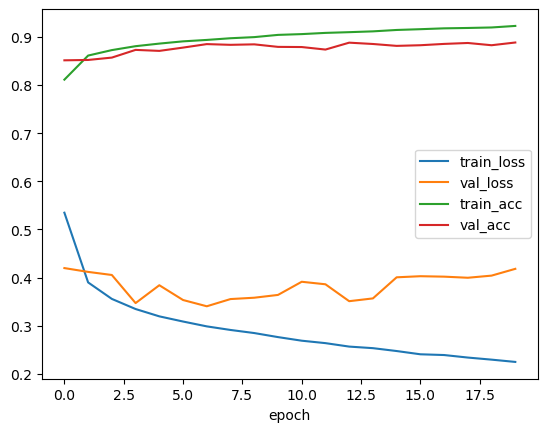

In [16]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()

plt.show()

- 훈련 손실은 계속 감소하는데 검증 손실은 감소하다가 상승하여 과대적합 모델이 만들어짐
    - 검증 손실이 상승하는 시점을 가능한한 뒤로 늦출 필요가 있음

In [17]:
# Adam 옵티마이저 선택
model = model_fn()
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val))

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5177 - accuracy: 0.8195 - val_loss: 0.4510 - val_accuracy: 0.8369
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3894 - accuracy: 0.8600 - val_loss: 0.3953 - val_accuracy: 0.8566
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3502 - accuracy: 0.8736 - val_loss: 0.3867 - val_accuracy: 0.8587
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3250 - accuracy: 0.8808 - val_loss: 0.3458 - val_accuracy: 0.8684
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3077 - accuracy: 0.8876 - val_loss: 0.3552 - val_accuracy: 0.8674
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2911 - accuracy: 0.8909 - val_loss: 0.3263 - val_accuracy: 0.8789
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2801 - accuracy: 0.8954 - val_loss: 0.3564 - val_accuracy:

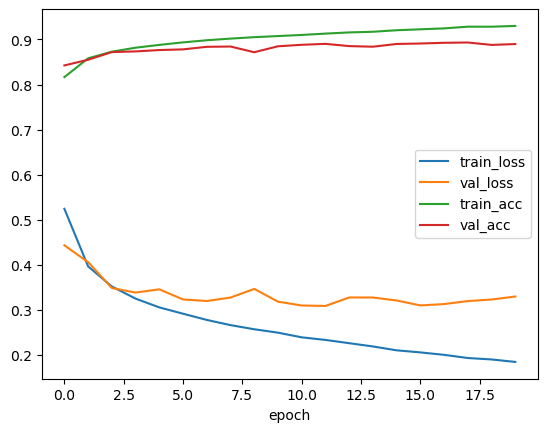

In [18]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()

plt.show()

- RMSprop을 사용할 때 보다 검증 손실 그래프의 감소 추세가 길게 이어지고 있어 Adam 옵티마이저가 이 데이터셋에 잘 맞는 것으로 보임

# 드롭아웃(dropout)

<img src = "./image/dropout.png">

- 훈련 과정에서 층의 일부 뉴런을 랜덤하게 끄는 것으로(출력을 0으로 만드는 것으로) 과대적합을 방지
    - 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있음
    - 일부 뉴런의 출력이 없을 수 있다는 것을 감안하여 학습하게 됨
        - 모든 입력값에 대해 충분한 주의를 기울이는 방향으로 학습
        
- 드롭아웃은 케라스에서 Dropout 클래스로 제공
- 특정 층 뒤에 드롭아웃을 두어 해당 층의 출력을 랜덤하게 0으로 만듦
- Flatten과 마찬가지로 층처럼 사용되지만 훈련되는 모델 파라미터가 없음

In [6]:
model = model_fn(keras.layers.Dropout(0.3)) # 30%를 드롭아웃
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 드롭아웃 층은 입력과 출력의 크기가 같음
    - 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지 않음
    
- 모델 훈련이 끝난 후에 평가나 예측을 수행할 때에는 드롭아웃을 적용하지 않아야함
    - 훈련된 모든 유닛을 사용해야 올바른 예측을 수행할 수 있기 때문에
    - 케라스에서는 모델을 평가와 예측에 사용할 때에는 자동으로 드롭아웃을 적용하지 않음

In [16]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val))

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5846 - accuracy: 0.7944 - val_loss: 0.4482 - val_accuracy: 0.8365
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4342 - accuracy: 0.8415 - val_loss: 0.3917 - val_accuracy: 0.8575
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4005 - accuracy: 0.8549 - val_loss: 0.3682 - val_accuracy: 0.8643
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3772 - accuracy: 0.8637 - val_loss: 0.3537 - val_accuracy: 0.8709
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3690 - accuracy: 0.8651 - val_loss: 0.3602 - val_accuracy: 0.8664
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3523 - accuracy: 0.8706 - val_loss: 0.3470 - val_accuracy: 0.8749
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3387 - accuracy: 0.8753 - val_loss: 0.3368 - val_accuracy:

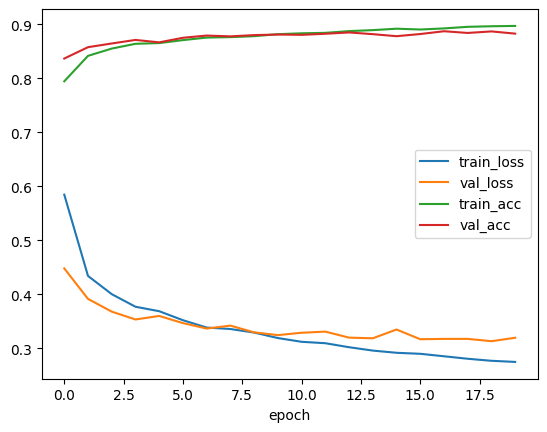

In [17]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()

plt.show()

- 앞선 방법들에 비해 loss와 acc가 비교적 일정하게 유지됨

# 모델 저장과 복원

- 나중에 다시 사용하기 위해서 모델을 저장
- 케라스 모델은 모델의 파라미터를 저장하는 save_weights()메서드를 제공
- 모델 구조와 모델 파라미터를 제공하는 save() 메서드도 제공

In [18]:
model.save_weights("model-weights.h5")

In [19]:
model.save("model-whole.h5")

## 모델 파라미터만 읽어오기

In [20]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("model-weights.h5")

- load_weights() 메서드를 사용하면 save_weights()로 저장했던 모델과 정확히 같은 구조를 가져야함
- 텐서플로 버전에 따라 load_weights()의 버그로 인해 evaluate()를 사용하기 전에 compile()을 반드시 실행해야하는 경우가 있음

In [21]:
val_labels = np.argmax(model.predict(scaled_val), axis = -1)

375/375 [==============================] - 1s 2ms/step


In [22]:
val_labels == y_val

array([ True,  True,  True, ...,  True,  True,  True])

In [23]:
print(np.mean(val_labels == y_val))

0.8845


- 케라스의 predict()메서드는 모델의 예측을 수행
    - 종속변수가 10개의 클래스로 이루어져 있기 때문에 각 클래스에 대한 확률을 반환
    
- predict()결과에서 가장 큰 값을 고르기 위해 argmax()함수를 사용
    - 배열에서 가장 큰 값의 인덱스를 반환
    - 몇 번째 클래스에 대한 확률값이 가장 큰 지 반환
        - 몇 번째 클래스로 예측했는지 알 수 있음
        
- argmax()함수의 axis = -1 은 배열의 마지막 차원을 따라서 최댓값을 고름

- argmax()로 고른 인덱스와 타깃 인덱스를 비교하여 같으면 1, 다르면 0
    - 위 값의 평균을 구하면 정확도가 됨

## 모델 전체 읽어오기

In [25]:
model_whole = keras.models.load_model("model-whole.h5", compile = False)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 13: invalid start byte

In [26]:
val_labels = np.argmax(model_whole.predict(scaled_val), axis = -1)

NameError: name 'model_whole' is not defined

In [27]:
print(np.mean(val_labels == y_val))

0.8845


# 콜백(callback)

- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
- fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용

## ModelCheckpoint 콜백

- 최상의 검증 점수를 만드는 모델을 저장

In [17]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-model.h5", save_best_only = True)

In [18]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val),
          callbacks = [checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5867 - accuracy: 0.7965 - val_loss: 0.4533 - val_accuracy: 0.8342
Epoch 2/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4372 - accuracy: 0.8418 - val_loss: 0.3855 - val_accuracy: 0.8572
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4027 - accuracy: 0.8538 - val_loss: 0.3901 - val_accuracy: 0.8574
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3815 - accuracy: 0.8595 - val_loss: 0.3472 - val_accuracy: 0.8727
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3662 - accuracy: 0.8661 - val_loss: 0.3533 - val_accuracy: 0.8668
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3494 - accuracy: 0.8702 - val_loss: 0.3582 - val_accuracy: 0.8673
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3429 - accuracy: 0.8726 - val_loss: 0.3470 - val_accuracy:

- 모델이 훈련한 후에 best-model.h5 에 최상의 val_loss를 낸 모델이 저장됨

In [19]:
model.evaluate(scaled_val, y_val)

375/375 [==============================] - 2s 5ms/step - loss: 0.3257 - accuracy: 0.8858


[0.32568010687828064, 0.8858333230018616]

In [20]:
best_model = keras.models.load_model("./model/best-model.h5")

In [21]:
best_model.evaluate(scaled_val, y_val)

375/375 [==============================] - 2s 6ms/step - loss: 0.3080 - accuracy: 0.8894


[0.3080121874809265, 0.8894166946411133]

- ModelCheckpoint 콜백이 가장 낮은 검증 손실값의 모델을 자동으로 저장해주어 편리하지만 여전히 20번의 훈련을 해야해서 불편함이 있음

## EarlyStopping 콜백

- 과대적합이 시작되기 전에(검증점수가 상승할 때) 훈련을 미리 중지하는 것을 조기 종료(early stopping)이라고 부름

In [22]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

- patience
    - 검증 점수가 향상되지 않더라도 지켜볼 에포크 횟수
    - patience가 2라면 2번 연속 검증 점수가 향상되지 않으면 훈련 중지
    
- restore_best_weights
    - 가장 낮은 검증 손실을 낸 모델의 상태로 되돌림

In [23]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
model.fit(scaled_train, y_train, epochs = 20, validation_data = (scaled_val, y_val),
          callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5930 - accuracy: 0.7903 - val_loss: 0.4332 - val_accuracy: 0.8423
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4416 - accuracy: 0.8398 - val_loss: 0.3996 - val_accuracy: 0.8518
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4071 - accuracy: 0.8524 - val_loss: 0.3819 - val_accuracy: 0.8587
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3862 - accuracy: 0.8584 - val_loss: 0.3576 - val_accuracy: 0.8686
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3716 - accuracy: 0.8644 - val_loss: 0.3465 - val_accuracy: 0.8702
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3561 - accuracy: 0.8689 - val_loss: 0.3441 - val_accuracy: 0.8741
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3438 - accuracy: 0.8750 - val_loss: 0.3279 - val_accuracy:

In [24]:
# 몇 번째 에포크에서 중지되었는지 확인
print(early_stopping_cb.stopped_epoch)

12


- 13번째 에포크까지 훈련한 후 중지됨
    - patience가 2이기 때문에 11번째 에포크 때의 모델이 최상의 모델임

In [25]:
model.evaluate(scaled_val, y_val)

375/375 [==============================] - 2s 6ms/step - loss: 0.3192 - accuracy: 0.8832


[0.31922677159309387, 0.8832499980926514]

# validation_split

- 훈련 데이터를 자체적으로 훈련/검증 셋으로 나누어서 훈련/검증을 수행

In [26]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
scaled_train = x_train / 255
scaled_test = x_test / 255

In [27]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(scaled_train, y_train, epochs = 20, validation_split = 0.2,
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6075 - accuracy: 0.7870 - val_loss: 0.4235 - val_accuracy: 0.8478
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4465 - accuracy: 0.8388 - val_loss: 0.3871 - val_accuracy: 0.8585
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4097 - accuracy: 0.8513 - val_loss: 0.3697 - val_accuracy: 0.8650
Epoch 4/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3873 - accuracy: 0.8592 - val_loss: 0.3637 - val_accuracy: 0.8691
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3697 - accuracy: 0.8633 - val_loss: 0.3505 - val_accuracy: 0.8734
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3590 - accuracy: 0.8677 - val_loss: 0.3462 - val_accuracy: 0.8698
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3431 - accuracy: 0.8734 - val_loss: 0.3473 - val_accuracy:

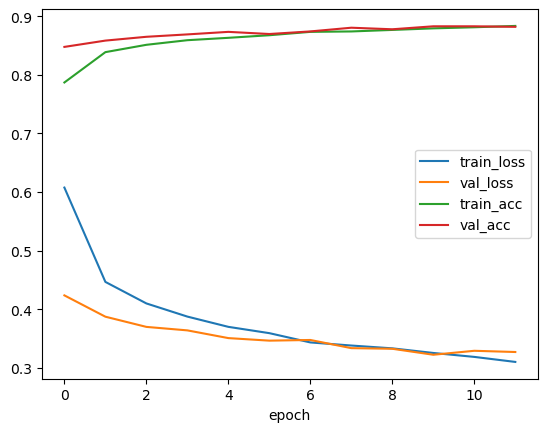

In [28]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()

plt.show()

In [29]:
model.evaluate(scaled_test,  y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3519 - accuracy: 0.8753


[0.35185158252716064, 0.8752999901771545]